<a href="https://colab.research.google.com/github/souptikmajumder/Titanic-Dataset/blob/master/Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
from google.colab import files
uploaded = files.upload()

import io
df_test = pd.read_csv(io.BytesIO(uploaded['test.csv']))
df_train = pd.read_csv(io.BytesIO(uploaded['train.csv']))



In [0]:
df_train.shape #891 rows and 12 columns/independent variable

(891, 12)

In [0]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [0]:
#age,embarked,cabin--> have null values 


In [0]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Null Value Analysis and Treatment

#### Analysis for column `Age`

In [0]:
df_train['Age'].isna().sum()/len(df_train['Age']) *100            #19.8 % of the data is null in Age

19.865319865319865

##### Let's Analyse the possible ways to impute the missing values of Age and their affect on the distribution of the data 

1. Imputing the values with 0

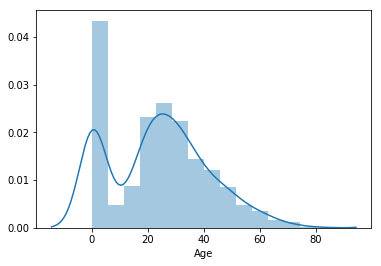

In [0]:
sns.distplot(df_train['Age'].fillna(0))

2. Imputing with median 

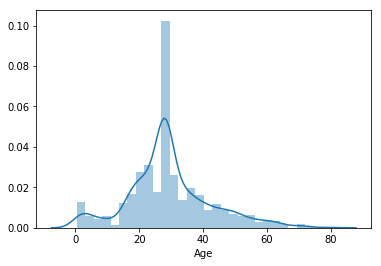

In [0]:
sns.distplot(df_train['Age'].fillna(df_train['Age'].median()))
plt.show()

3. Imputing with mean

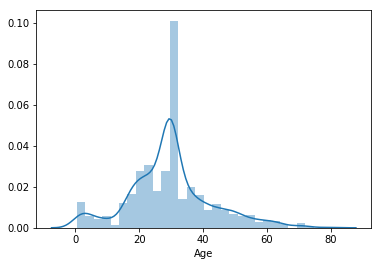

In [0]:
sns.distplot(df_train['Age'].fillna(df_train['Age'].mean()))
plt.show()

In [0]:
# We see that imputing with mean and median keeps the normal distribution of the data and hence we can either impute with 
# mean or median value 

In [0]:
df_train['Age']=df_train['Age'].fillna(df_train['Age'].mean())

#### Analysis for column `Embarked`

In [0]:
df_train['Embarked'].isna().sum()/len(df_train['Age']) * 100 #percentage of null value in column-->embarked 

0.22446689113355783

Since it is a small percentage of null values in `Embarked`, we can retain them as of now.

#### Analysis for column `Cabin`

In [0]:
df_train['Cabin'].isna().sum()/len(df_train['Cabin']) *100

77.10437710437711

We see that `Cabin` has `77.1 %` of missing values.Hence, we can drop the column as the threshold for any column to have null values is `50%` at max. 

In [0]:
df_train=df_train.drop('Cabin',axis=1)

### Outlier Treatment

In [0]:
df_train.dtypes #type of data in each column in train dataset

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

#### Analysis for column `Age`

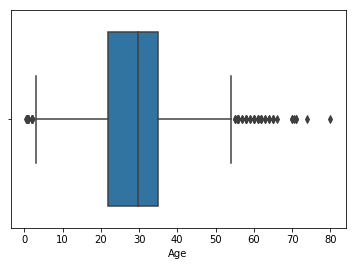

In [0]:
sns.boxplot(df_train['Age'])

Since, we see that most of the outliers are below 0 and above 55 years of age,hence we can drop the outliers. 

In [0]:
#Removing the outlier for Age
Q1 = df_train['Age'].quantile(0.10) 
Q3 = df_train['Age'].quantile(0.95)
IQR = Q3 - Q1
df_train = df_train[(df_train['Age'] >= Q1) & (df_train['Age'] <= Q3)] #retaining ages within 10th and 85th percentile

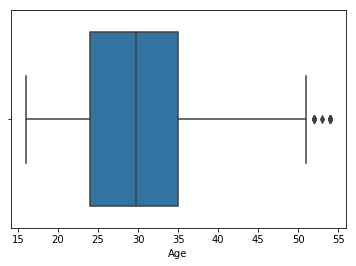

In [0]:
sns.boxplot(df_train['Age'])

#### Analysis for `Pclass`

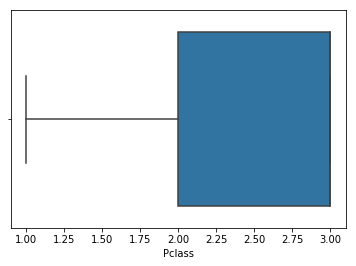

In [0]:
sns.boxplot(df_train['Pclass'])
plt.show() # no outliers for Pclass 

#### Analysis for `SibSp`

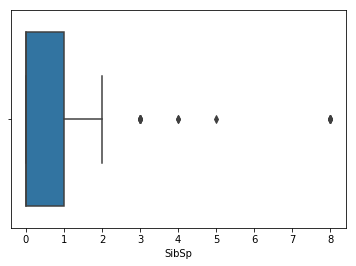

In [0]:
sns.boxplot(df_train['SibSp'])
plt.show()

In [0]:
Q1 = df_train['SibSp'].quantile(0.05) 
Q3 = df_train['SibSp'].quantile(0.95)
IQR = Q3 - Q1
df_train = df_train[(df_train['SibSp'] >= Q1) & (df_train['SibSp'] <= Q3)] #retaining values within 5th and 95th percentile

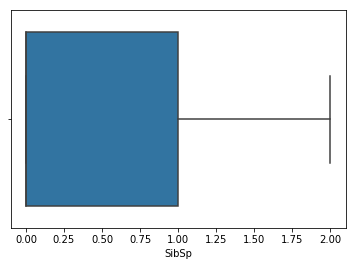

In [0]:
sns.boxplot(df_train['SibSp'])
plt.show()

#### Analysis for `Parch`

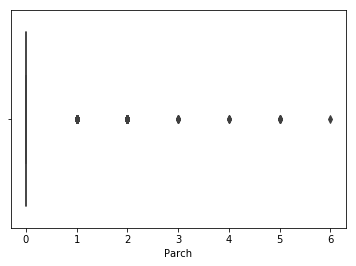

In [0]:
sns.boxplot(df_train['Parch'])
plt.show()

In [0]:
Q1 = df_train['Parch'].quantile(0.05) 
Q3 = df_train['Parch'].quantile(0.95)
IQR = Q3 - Q1
df_train = df_train[(df_train['Parch'] >= Q1) & (df_train['Parch'] <= Q3)] #retaining values within 5th and 95th percentile

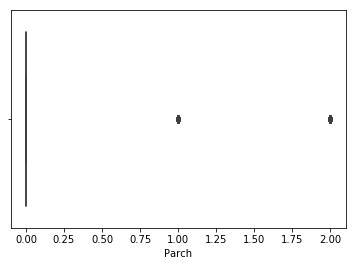

In [0]:
sns.boxplot(df_train['Parch'])

In [0]:
df_train['Parch'].value_counts()

0    631
1     68
2     34
Name: Parch, dtype: int64

Since, we see that the column `Parch` has all values `0` after Outlier Treatment, hence we can drop the column.

In [0]:
df_train=df_train.drop('Parch',axis=1)

#### Analysis for `Fare`

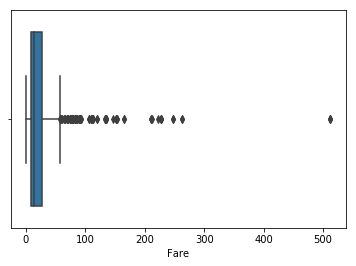

In [0]:
sns.boxplot(df_train['Fare'])
plt.show()

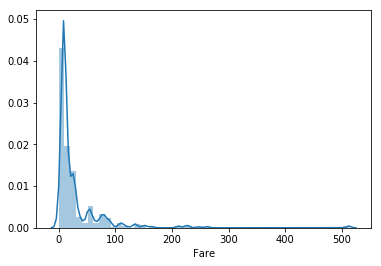

In [0]:
sns.distplot(df_train['Fare'])

In [0]:
Q1 = df_train['Fare'].quantile(0.05)
Q3 = df_train['Fare'].quantile(0.95)
IQR = Q3 - Q1
df_train = df_train[(df_train['Fare'] >= Q1) & (df_train['Fare'] <= Q3)] #retaining values within 5th and 95th percentile

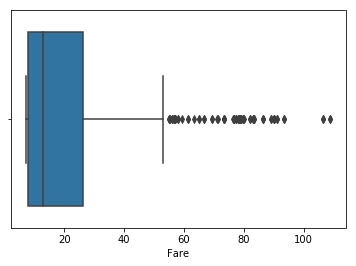

In [0]:
sns.boxplot(df_train['Fare'])

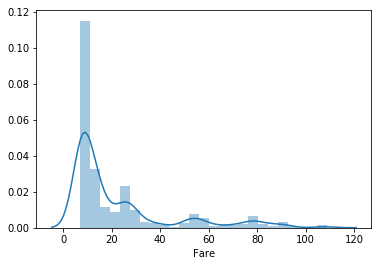

In [0]:
sns.distplot(df_train['Fare'])

In [0]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Fare
PassengerId,1.000000,-0.022176,-0.014377,0.017013,-0.037226,0.004831
Survived,-0.022176,1.000000,-0.350394,0.046230,0.083930,0.322319
Pclass,-0.014377,-0.350394,1.000000,-0.313782,-0.147076,-0.749321
Age,0.017013,0.046230,-0.313782,1.000000,0.085695,0.216820
SibSp,-0.037226,0.083930,-0.147076,0.085695,1.000000,0.358012
Fare,0.004831,0.322319,-0.749321,0.216820,0.358012,1.000000


So, we can see that the `Fare` has highest correlation with `Survival`, so we have retained 5 % to 70 % of the Fares.

Also, we can drop passenger id as it does not contribute to predict whether a passenger will survive or die.

In [0]:
df_train=df_train.drop('PassengerId',axis=1)

In [0]:
df_train.shape 

(659, 9)

In [0]:
round(df_train.shape[0]/891 *100,2) 

73.96

We have retained about `41.64%` of the original data.

In [0]:
np.set_printoptions(threshold=np.inf) #number of null values per row
np.array(df_train.isna().sum(axis=1))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [0]:
df_train_final = df_train # final dataset for training

In [0]:
df_train_final = df_train_final.drop(['Name','Ticket'],axis=1) #dropping name and Ticket 

In [0]:
df_train_final.shape


(659, 7)

#### Dummy Variables

Introducing dummy variables for columns `Embarked` and `Sex`

In [0]:
df_train_final = pd.get_dummies(df_train_final,columns=['Embarked','Sex'],drop_first=True)


In [0]:
df_train_final.head(5)

,Survived,Pclass,Age,SibSp,Fare,Embarked_Q,Embarked_S,Sex_male
0,0,3,22.0,1,7.2500,0,1,1
1,1,1,38.0,1,71.2833,0,0,0
2,1,3,26.0,0,7.9250,0,1,0
3,1,1,35.0,1,53.1000,0,1,0
4,0,3,35.0,0,8.0500,0,1,1


In [0]:
X_train = df_train_final.drop(['Survived'],axis=1)
y_train = df_train_final['Survived']

### Feature Scaling

Let's do feature scaling for independent variables which will be used for model building.

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()

X_train[['Pclass','Age','Fare','SibSp','Embarked_Q','Embarked_S','Sex_male']] = scaler.fit_transform(X_train[['Pclass','Age','Fare','SibSp','Embarked_Q','Embarked_S','Sex_male']])

X_train.head()

,Pclass,Age,SibSp,Fare,Embarked_Q,Embarked_S,Sex_male
0,0.79668,-0.958453,1.405676,-0.683539,-0.327968,0.608328,0.688675
1,-1.69153,0.892834,1.405676,2.204656,-0.327968,-1.643851,-1.452064
2,0.79668,-0.495632,-0.561077,-0.653093,-0.327968,0.608328,-1.452064
3,-1.69153,0.545718,1.405676,1.384506,-0.327968,0.608328,-1.452064
4,0.79668,0.545718,-0.561077,-0.647455,-0.327968,0.608328,0.688675


### Correlation matrix 

Plotting the correlation among the variables below

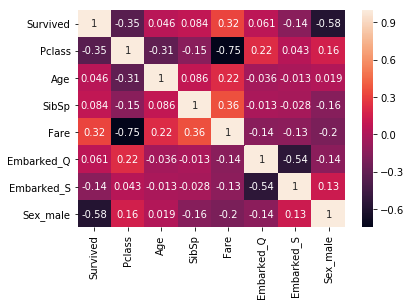

In [0]:
sns.heatmap(df_train_final.corr(),annot=True)
plt.show()

In [0]:
X_train_final= X_train.drop('Embarked_S',axis=1) #dropping the highly correlated dummy variable

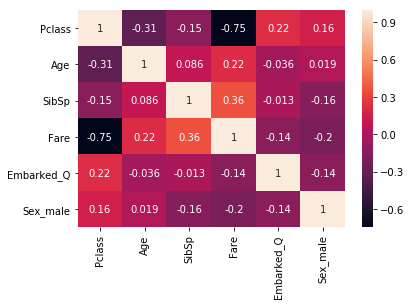

In [0]:
sns.heatmap(X_train_final.corr(),annot=True)
plt.show()

### Model Building

In [0]:
import statsmodels.api as sm

In [0]:
l1=sm.GLM(y_train,sm.add_constant(X_train_final),family = sm.families.Binomial())
l1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  659
Model:                            GLM   Df Residuals:                      652
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -283.36
Date:                Wed, 04 Sep 2019   Deviance:                       566.72
Time:                        08:54:23   Pearson chi2:                     675.
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7551      0.109     -6.941      0.000      -0.968      -0.542
Pclass        -0.7529      0.163     -4.631      0.000      -1.072      -0.434
Age           -0.1149      0.113     -1.017      0.309      -0.336       0.106
SibSp         -0.2070      0.122     -1.698      0.090      -0.446       0.032
Fare           0.2578      0.175      1.476      0.140      -0.085       0.600
Embarked_Q     0.1607      0.106      1.521      0.128      -0.046       0.368
Sex_male      -1.3433      0.109    -12.302      0.000      -1.557      -1.129
==============================================================================
"""

In [0]:
X_train_final = X_train_final.drop('Age',axis=1) #dropping statistically insignificant variable

In [0]:
l2=sm.GLM(y_train,sm.add_constant(X_train_final),family = sm.families.Binomial())
l2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  659
Model:                            GLM   Df Residuals:                      653
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -283.88
Date:                Wed, 04 Sep 2019   Deviance:                       567.76
Time:                        08:54:23   Pearson chi2:                     677.
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7557      0.109     -6.953      0.000      -0.969      -0.543
Pclass        -0.7099      0.157     -4.530      0.000      -1.017      -0.403
SibSp         -0.2125      0.122     -1.743      0.081      -0.451       0.026
Fare           0.2583      0.174      1.482      0.138      -0.083       0.600
Embarked_Q     0.1547      0.105      1.470      0.142      -0.052       0.361
Sex_male      -1.3486      0.109    -12.366      0.000      -1.562      -1.135
==============================================================================
"""

In [0]:
X_train_final = X_train_final.drop('Embarked_Q',axis=1) #dropping statistically insignificant variable

In [0]:
l3=sm.GLM(y_train,sm.add_constant(X_train_final),family = sm.families.Binomial())
l3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  659
Model:                            GLM   Df Residuals:                      654
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -284.96
Date:                Wed, 04 Sep 2019   Deviance:                       569.91
Time:                        08:54:23   Pearson chi2:                     670.
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7461      0.108     -6.911      0.000      -0.958      -0.534
Pclass        -0.6660      0.153     -4.350      0.000      -0.966      -0.366
SibSp         -0.2190      0.122     -1.795      0.073      -0.458       0.020
Fare           0.2678      0.174      1.540      0.123      -0.073       0.609
Sex_male      -1.3734      0.108    -12.669      0.000      -1.586      -1.161
==============================================================================
"""

In [0]:
X_train_final = X_train_final.drop('SibSp',axis=1) #dropping statistically insignificant variable

In [0]:
l4=sm.GLM(y_train,sm.add_constant(X_train_final),family = sm.families.Binomial())
res=l4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  659
Model:                            GLM   Df Residuals:                      655
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -286.62
Date:                Wed, 04 Sep 2019   Deviance:                       573.23
Time:                        08:54:23   Pearson chi2:                     669.
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7518      0.108     -6.972      0.000      -0.963      -0.540
Pclass        -0.7351      0.150     -4.894      0.000      -1.030      -0.441
Fare           0.1231      0.154      0.799      0.424      -0.179       0.425
Sex_male      -1.3420      0.106    -12.703      0.000      -1.549      -1.135
==============================================================================
"""

In [0]:
X_train_final = X_train_final.drop('Fare',axis=1) #dropping statistically insignificant variable

In [0]:
l5=sm.GLM(y_train,sm.add_constant(X_train_final),family = sm.families.Binomial())
res=l5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  659
Model:                            GLM   Df Residuals:                      656
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -286.94
Date:                Wed, 04 Sep 2019   Deviance:                       573.87
Time:                        08:54:24   Pearson chi2:                     682.
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7584      0.108     -7.045      0.000      -0.969      -0.547
Pclass        -0.8209      0.106     -7.764      0.000      -1.028      -0.614
Sex_male      -1.3485      0.105    -12.799      0.000      -1.555      -1.142
==============================================================================
"""

In [0]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [0]:
# Create a dataframe that will contain the names of all the feature variables that w used before and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_final.columns
vif['VIF'] = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Pclass,1.03
1,Sex_male,1.03


In [0]:
X_train_pred = sm.add_constant(X_train_final)
y_pred = res.predict(X_train_pred) # predictions of survival
y_pred.head()

0    0.087779
1    0.930110
2    0.633135
3    0.930110
4    0.087779
dtype: float64

In [0]:
survival_df = pd.DataFrame({'Survived_actual':y_train.values})
survival_df['passenger_index'] = y_train.index
survival_df.head()

,Survived_actual,passenger_index
0,0,0
1,1,1
2,1,2
3,1,3
4,0,4


In [0]:
survival_df['Survived_prob']=np.array(y_pred)

In [0]:
survival_df['Survived_predicted']=survival_df['Survived_prob'].map(lambda x:1 if x>0.5 else 0)
survival_df.head()

,Survived_actual,passenger_index,Survived_prob,Survived_predicted
0,0,0,0.087779,0
1,1,1,0.930110,1
2,1,2,0.633135,1
3,1,3,0.930110,1
4,0,4,0.087779,0


In [0]:
survival_df['Survived_actual'].value_counts() #number of actual survived and dead 

0    419
1    240
Name: Survived_actual, dtype: int64

In [0]:
survival_df['Survived_predicted'].value_counts() #number of predicted survived and dead

0    447
1    212
Name: Survived_predicted, dtype: int64

#### Model metrics and score

In [0]:
from sklearn import metrics

In [0]:
print(metrics.accuracy_score(survival_df.Survived_actual, survival_df.Survived_predicted))

0.8088012139605463


Accuracy of Model - `84.3`

#### Analysis of ROC,Specificity,Sensitivity

In [0]:
conf_matrix=metrics.confusion_matrix(survival_df.Survived_actual,survival_df.Survived_predicted)
conf_matrix

array([[370,  49],
       [ 77, 163]])

In [0]:
#                     Actual Survived     Actual Dead

#Predicted Survived       253               28

#Predicted Dead            30               60

In [0]:
TP=conf_matrix[0,0] #actual survived -- predicted survived
TN=conf_matrix[1,1] #actual dead     -- predicted dead
FP=conf_matrix[0,1] #actual dead     -- predicted survived
FN=conf_matrix[1,0] #actual survived -- predicted dead

In [0]:
#Sensitivity
TP / float(TP+FN)

0.8277404921700223

In [0]:
#Specificity
TN/float(FP+TN)

0.7688679245283019

In [0]:
#False Positive Rate
FP / float(FP+TN)

0.23113207547169812

In [0]:
#Positive Predictive Value
TP / float(TP+FP)

0.883054892601432

In [0]:
#Negative Predictive Value
TN / float(TN+FN)

0.6791666666666667

Sensitivity - `89%`
Specificity - `68%`
False Positive Rate - `31.8`
Positive Predicted Value - `90.0`
Negative Predicted Value - `66.6`

#### ROC Curve

In [0]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [0]:
fpr, tpr, thresholds = metrics.roc_curve(survival_df.Survived_actual, survival_df.Survived_predicted, drop_intermediate = False )

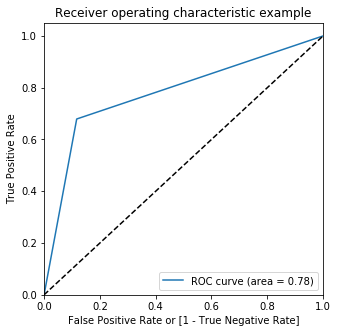

In [0]:
draw_roc(survival_df.Survived_actual, survival_df.Survived_predicted)

The area under the curve `AUC`is the measure of the goodness of the model.For this case, the area is `0.78`

In [0]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    survival_df[i]= survival_df.Survived_prob.map(lambda x: 1 if x > i else 0)
survival_df.head(10)

,Survived_actual,passenger_index,Survived_prob,Survived_predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0,0.087779,0,1,0,0,0,0,0,0,0,0,0
1,1,1,0.930110,1,1,1,1,1,1,1,1,1,1,1
2,1,2,0.633135,1,1,1,1,1,1,1,1,0,0,0
3,1,3,0.930110,1,1,1,1,1,1,1,1,1,1,1
4,0,4,0.087779,0,1,0,0,0,0,0,0,0,0,0
5,0,5,0.087779,0,1,0,0,0,0,0,0,0,0,0
6,0,6,0.425957,0,1,1,1,1,1,0,0,0,0,0
7,1,8,0.633135,1,1,1,1,1,1,1,1,0,0,0
8,0,12,0.087779,0,1,0,0,0,0,0,0,0,0,0
9,1,17,0.210866,0,1,1,1,0,0,0,0,0,0,0


In [0]:
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

#TP=conf_matrix[0,0] #actual survived -- predicted survived
#TN=conf_matrix[1,1] #actual dead     -- predicted dead
#FP=conf_matrix[0,1] #actual dead     -- predicted survived
#FN=conf_matrix[1,0] #actual survived -- predicted dead

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(survival_df.Survived_actual, survival_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,probability,accuracy,sensitivity,specificity
0.0,0.0,0.364188,1.000000,0.000000
0.1,0.1,0.679818,0.850000,0.582339
0.2,0.2,0.679818,0.850000,0.582339
0.3,0.3,0.790592,0.820833,0.773270
0.4,0.4,0.790592,0.820833,0.773270
0.5,0.5,0.808801,0.679167,0.883055
0.6,0.6,0.808801,0.679167,0.883055
0.7,0.7,0.796662,0.466667,0.985680
0.8,0.8,0.796662,0.466667,0.985680
0.9,0.9,0.719272,0.233333,0.997613


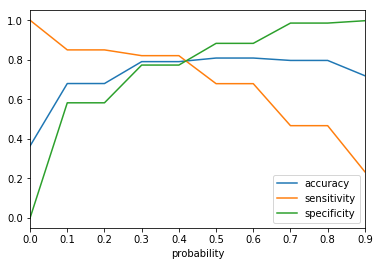

In [0]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

We see that `0.12` seems to be a good cut-off for predicting survived vs dead.

In [0]:
survival_df['Survived_predicted']=survival_df['Survived_prob'].map(lambda x:1 if x>0.45 else 0) #setting threshold at 0.2

In [0]:
conf_matrix_2=metrics.confusion_matrix(survival_df.Survived_actual,survival_df.Survived_predicted)
conf_matrix_2

array([[370,  49],
       [ 77, 163]])

In [0]:
TP=conf_matrix_2[0,0] #actual survived -- predicted survived
TN=conf_matrix_2[1,1] #actual dead     -- predicted dead
FP=conf_matrix_2[0,1] #actual dead     -- predicted survived
FN=conf_matrix_2[1,0] #actual survived -- predicted dead

In [0]:
#Sensitivity
TP / float(TP+FN)

0.8277404921700223

In [0]:
#Specificity
TN/float(FP+TN)

0.7688679245283019

In [0]:
#False Positive Rate
FP / float(FP+TN)

0.23113207547169812

In [0]:
#Positive Predictive Value
TP / float(TP+FP)

0.883054892601432

In [0]:
#Negative Predictive Value
TN / float(TN+FN)

0.6791666666666667

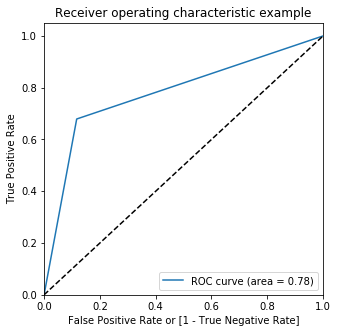

In [0]:
draw_roc(survival_df.Survived_actual, survival_df.Survived_predicted)

`AUC` Under ROC Curve for threshold set at 0.2 is `0.78`. 

## Test Data

In [0]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
df_test.shape

(418, 11)

#### Adding Dummy Variable in test data

In [0]:
df_test = pd.get_dummies(df_test,columns=['Embarked','Sex'],drop_first=True)

In [0]:
df_test.shape

(418, 12)

In [0]:
df_test.head() 

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S,Sex_male
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,1,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,1,0,1
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,0,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,0,1,0


In [0]:
df_test[['Pclass','Age','Fare','SibSp','Embarked_Q','Embarked_S','Sex_male']] = scaler.transform(df_test[['Pclass','Age','Fare','SibSp','Embarked_Q','Embarked_S','Sex_male']])
df_test.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S,Sex_male
0,892,0.796680,"Kelly, Mr. James",0.487865,-0.561077,0,330911,-0.657414,NaN,3.049078,-1.643851,0.688675
1,893,0.796680,"Wilkes, Mrs. James (Ellen Needs)",1.934183,1.405676,0,363272,-0.694815,NaN,-0.327968,0.608328,-1.452064
2,894,-0.447425,"Myles, Mr. Thomas Francis",3.669765,-0.561077,0,240276,-0.573596,NaN,3.049078,-1.643851,0.688675
3,895,0.796680,"Wirz, Mr. Albert",-0.379926,-0.561077,0,315154,-0.619828,NaN,-0.327968,0.608328,0.688675
4,896,0.796680,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",-0.958453,1.405676,1,3101298,-0.456324,NaN,-0.327968,0.608328,-1.452064


In [0]:
df_test= df_test.drop('Embarked_S',axis=1) #dropping the highly correlated dummy variable

In [0]:
df_test=df_test.drop(['Name','Ticket'],axis=1)

In [0]:
df_test.shape

(418, 9)

In [0]:
df_test_final=df_test.drop(['Age','Fare','SibSp','PassengerId','Parch','Cabin','Embarked_Q'],axis=1) #final test dataset

In [0]:
y_pred = res.predict(sm.add_constant(df_test_final)) # predictions of survival for 
y_pred.head()

0    0.087779
1    0.633135
2    0.210866
3    0.087779
4    0.633135
dtype: float64

In [0]:
y_pred.shape

(418,)

In [0]:
y_pred_df=pd.DataFrame(df_test["PassengerId"])
y_pred_df['Survived']=y_pred

In [0]:
y_pred_df['Survived']=y_pred_df['Survived'].map(lambda x:1 if x>0.45 else 0)

In [0]:
y_pred_df.shape

(418, 2)

In [0]:
y_pred_df.to_csv('Submission_1.csv')